## Sistema Imunológico artificial


#### Uma análise de uma implementação do algorítimo Clonal

source: https://github.com/kittsville/KAPA

##### 1. Introdução

Este trabalho é uma análise da implementação do algorítmo Clonal. Dois testes foram realizados: a) dado um conjunto de antígenos, serão produzidos anticorpos capazes de identificar os antígenos. Os caracteres foram convertidos em uma condificação em antígenos representando-os usando o espaço de forma Hamming; b) o número de gerações tomadas para a convergência permanece constante conforme aumenta o número de antígenos, dado Ag <= Ab, mas neste caso, o número de antígenos é a variável independente e o número de gerações tomadas para convergência como a variável dependente.

##### 2. Execução 

Os testes foram executados usando-se o Python versão 2.7.15, e os códigos fontes estão no mesmo diretório deste Notebook. Nas células abaixo, é possível verificar o código fonte dos testes e seus resultados. 

No primeiro teste, estabelece-se uma lista de antígenos e seu nome corresponde a um arquivo .PNG que pode ser encontrado na pasta DIGITS. Estes arquivos são convertidos em antígenos pela função **helpers.create_antigen** e normalizados para as cores preto/branco. Em seguida são criados 10 anticorpos com a função **kapa.Antibody()**. Neste teste o algorítmo é executado 3 vezes e os demais parâmetros utilizados foram: 

{ &nbsp;

generations          = 60, *Representa o número de vezes que o processo de clonagem será executado* &nbsp;

num_clone_antibodies = 5,  *Número de anticorpos a serem clonados* &nbsp;

num_kill_antibodies  = 0,  *Número de células com baixa afinidade que devem ser excluídas* &nbsp;

clone_multiplier     = 10  *Taxa para clonar um anticorpo em relação por sua afinidade com o antígeno* &nbsp;

} &nbsp; 

No segundo teste, a mudança ocorre de modo a se executar o algoritmo variando a quantidade de antígenos. Executa-se o Clonal diversas vezes, sendo que na primeira vez existe apenas um único antígeno e na última 10 antígenos. Em todos os casos existe um conjunto de 10 anticorpos. Neste teste o algorítmo é executado uma única vez para determinada quantidade de antígenos e os demais parâmetros foram:

{ &nbsp;

generations          = 100, *Representa o número de vezes que o processo de clonagem será executado* &nbsp;

num_clone_antibodies = 5,  *Número de anticorpos a serem clonados* &nbsp;

num_kill_antibodies  = 0,  *Número de células com baixa afinidade que devem ser excluídas* &nbsp;

clone_multiplier     = 10  *Taxa para clonar um anticorpo em relação por sua afinidade com o antígeno* &nbsp;

} &nbsp; 

O algoritmo foi desenvolvido de modo que pode haver uma interrupção prematura do processo de clonagem caso a afinidade máxima seja atingida entre os anticorpos e os antígenos. A medida de afinidade é representada por um número de diferenças entre o anticorpo e o antígeno, sendo que quanto menor for o número, melhor será a afinidade apurada entre eles. Portanto, a afinidade "perfeita" se dá quando esta métrica for igual a 0 (zero).


In [2]:
## Primeiro Teste
import helpers
import numpy as np
import matplotlib.pyplot as plt
import kapa
import sys
import csv

digit_names = ['0', '1', '2', '3', '4', '6','9','period','left','right']

def print_shape(shape):
    x = -1
    for i in range(12):
        row = ''
        for j in range(10):
            x += 1
            if shape[x]:
                row += 'X'
            else:
                row += ' '
        print (row)

def affinityEvol(fit, keys):
    
    for key in keys:
        x1 = []
        y1 = []
        
        for item in fit:
            if (item['key'] == key):
               y1.append(item['affinity']);
               
        x1 = np.arange(len(y1));
        plt.plot(x1, y1, 'o-')
 

        
affinity_graph = []

for i in range(3):
    
    print ("Execução número: " + str(i))
    
    affinity_graph = kapa.kapa(
        antigens             = [helpers.create_antigen(name) for name in digit_names],
        antibodies           = [kapa.Antibody() for _ in range(10)],
        generations          = 60,
        num_clone_antibodies = 5,
        num_kill_antibodies  = 0,
        clone_multiplier     = 10
    )
    
    for affinity_rating in affinity_graph:
        affinity_rating['key'] = digit_names[affinity_rating['key']]
        
    affinityEvol(affinity_graph, digit_names)   
    


Execução número: 0


NameError: name 'xrange' is not defined

Terminating early at generation 49
Terminating early at generation 55
Terminating early at generation 57
Terminating early at generation 57
Terminating early at generation 57
Terminating early at generation 61
Terminating early at generation 58
Terminating early at generation 55
Terminating early at generation 60
Terminating early at generation 56


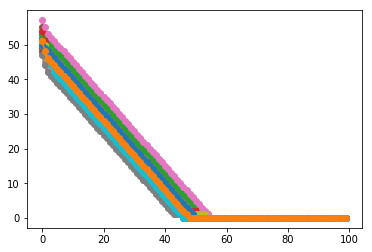

In [56]:
## Segundo Teste

import helpers
import kapa
import sys
import csv


results = []

for i in range(1, 11):
    result = kapa.kapa(
        antigens             = [kapa.Antibody() for _ in range(i)],
        antibodies           = [kapa.Antibody() for _ in range(10)],
        generations          = 100,
        num_clone_antibodies = 5,
        num_kill_antibodies  = 0,
        clone_multiplier     = 10
    )
    #print result
    results.append({
        'antigens' : i,
        'generations' : result
    })


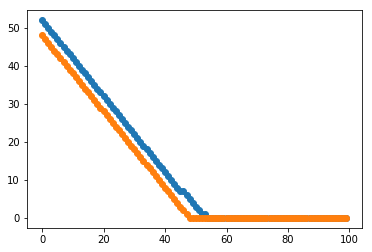

In [59]:
# com dois antígenos
affinityEvol(results[1]['generations'],[0,1])    


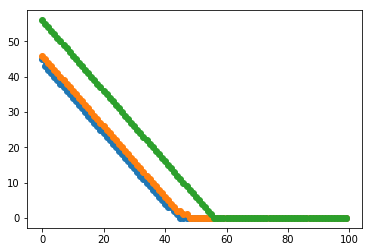

In [62]:
# com três antígenos
affinityEvol(results[2]['generations'],[0,1,2])    


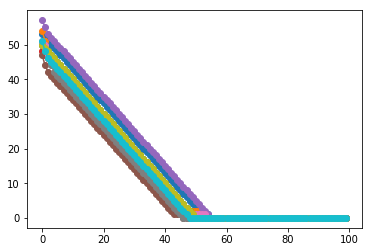

In [63]:
# com nove
affinityEvol(results[9]['generations'],[0,1,2,3,4,5,6,7,8,9])

##### 3. Análise 

Ambos os testes demonstraram a capacidade do algorítmo em se adaptar e aperfeiçoar sua afinidade com diversas quantidades de antígenos simultaneamente. 

Tanto nos gráfico do primeiro teste(1), como nos gráficos do segundo (2,3,4) mostram que o algorítmo atingiu a afinidade plena antes do número de interações previstas, 60 no primeiro caso e 100 no segundo. 

